### Import stuff

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from matplotlib import pyplot as plt
from helpers import *

import StyleTransfer

config = tf.ConfigProto()

# Reset TF default graph to run multiple sess without reloading notebook
def reset():
    tf.reset_default_graph()
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.4

## The StyleTransfer class performs style transfer when it is instanciated.

The class require many attributes to perform the optimization.

It will output an matplotlib plot with [initial image, content image, style image, stylized image].

You can get the final image by calling get_final() on the StyleTransfer object if you want to save it/re-optimize

The code can also use VOC segmentation if you provide the name of a file in the VOC dataset in voc_names



# Style Transfer example:

#### Load two images at same dimension and create a StyleTransfer object with params



Computing 3 masks


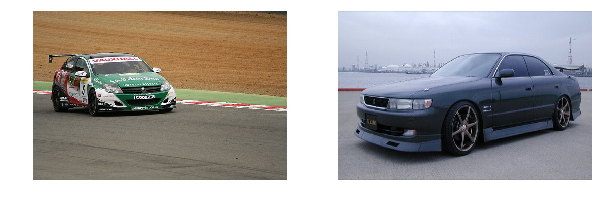

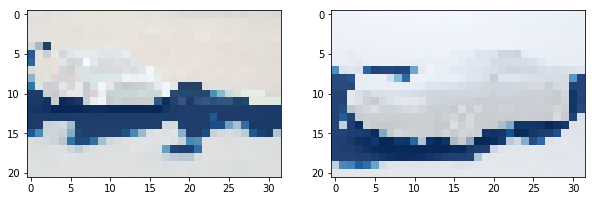

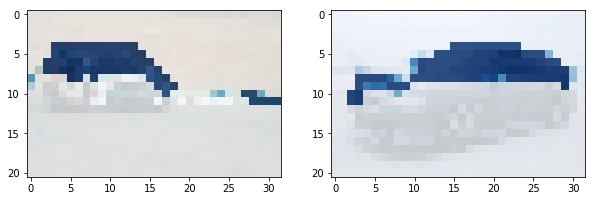

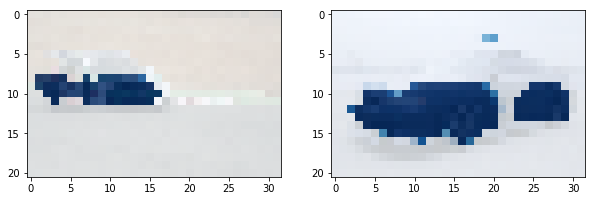

Start Training
Iteration 0 / 1000 
Content loss: 0.0 / No weight: 0.0
Style loss: 293.5043029785156 / No weight: 293.5043029785156
Affine loss: 0.24032069742679596 / No weight: 4.806413948535919e-05
Tv loss: 26.651668548583984 / No weight: 24.032069742679596
Iteration 100 / 1000 
Content loss: 12.35046100616455 / No weight: 0.0024700922012329102
Style loss: 15.827851295471191 / No weight: 15.827851295471191
Affine loss: 6.649615287780762 / No weight: 0.0013299230575561523
Tv loss: 5.6828837394714355 / No weight: 664.9615287780762
Iteration 200 / 1000 
Content loss: 12.105291366577148 / No weight: 0.0024210582733154296
Style loss: 13.697757720947266 / No weight: 13.697757720947266
Affine loss: 5.461446285247803 / No weight: 0.0010922892570495607
Tv loss: 4.809422969818115 / No weight: 546.1446285247803
Iteration 300 / 1000 
Content loss: 11.970123291015625 / No weight: 0.002394024658203125
Style loss: 13.212248802185059 / No weight: 13.212248802185059
Affine loss: 5.232705593109131 / No

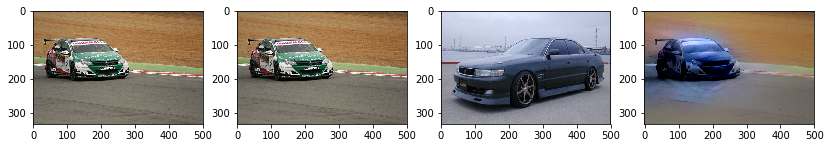

In [4]:
im_content = load_image2("data/VOC/VOCdevkit/VOC2012/JPEGImages/2007_003051.jpg")
im_style = load_image2("data/VOC/VOCdevkit/VOC2012/JPEGImages/2007_003143.jpg", height=im_content.shape[0], width=im_content.shape[1])
im_init = im_content


content_layer = ["conv4_4"]
style_layers = ["conv2_1", "conv3_1", "conv4_1", "conv5_1"]
mask_layer = "conv5_4"

num_iter = 1000
content_loss_w = 5000
style_loss_w = 1
matting_loss_w = 5000
tv_loss_w = 1e-2
K = 3
mask_soft_temp = 1
orphan = False #mean mask not used for style transfer
k_style = []
voc_names = []
debug = True

reset()
with tf.Session(config=config) as sess:
    style = StyleTransfer.StyleTransfer(content_layer, style_layers, mask_layer, im_init, im_content, im_style, sess, num_iter, content_loss_w, style_loss_w,
                                             K=K, orphan=orphan, debug=debug, matting_loss=matting_loss_w, tv_loss=tv_loss_w,
                                                soft_temp=mask_soft_temp, voc_names=voc_names, k_style=k_style)
    style1 = style.get_final()

## Can chose which layer to use with k_style (here only windshield)

Computing 3 masks


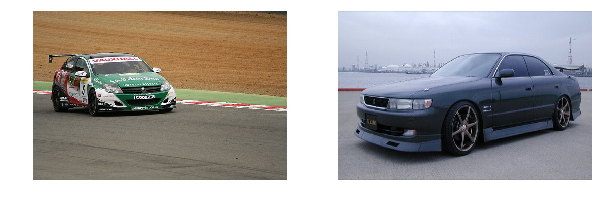

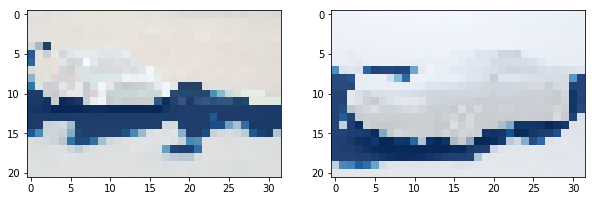

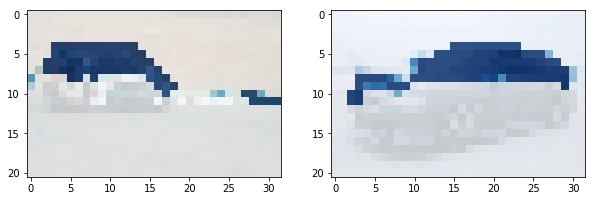

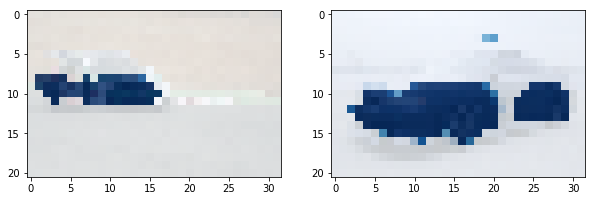

Start Training
Iteration 0 / 1000 
Content loss: 0.0 / No weight: 0.0
Style loss: 71.34722137451172 / No weight: 71.34722137451172
Affine loss: 0.2403229922056198 / No weight: 4.806459844112396e-05
Tv loss: 26.65165901184082 / No weight: 24.03229922056198
Iteration 100 / 1000 
Content loss: 5.376647472381592 / No weight: 0.0010753294944763183
Style loss: 4.490574359893799 / No weight: 4.490574359893799
Affine loss: 2.478349208831787 / No weight: 0.0004956698417663574
Tv loss: 3.6890716552734375 / No weight: 247.8349208831787
Iteration 200 / 1000 
Content loss: 5.336020469665527 / No weight: 0.0010672040939331054
Style loss: 3.9603147506713867 / No weight: 3.9603147506713867
Affine loss: 2.1354949474334717 / No weight: 0.00042709898948669435
Tv loss: 3.2307395935058594 / No weight: 213.54949474334717
Iteration 300 / 1000 
Content loss: 5.322122573852539 / No weight: 0.001064424514770508
Style loss: 3.763361692428589 / No weight: 3.763361692428589
Affine loss: 2.0618326663970947 / No wei

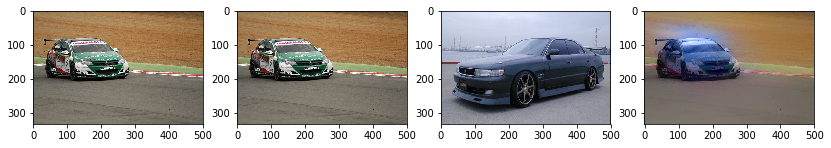

In [3]:
im_content = load_image2("data/VOC/VOCdevkit/VOC2012/JPEGImages/2007_003051.jpg")
im_style = load_image2("data/VOC/VOCdevkit/VOC2012/JPEGImages/2007_003143.jpg", height=im_content.shape[0], width=im_content.shape[1])
im_init = im_content


content_layer = ["conv4_4"]
style_layers = ["conv2_1", "conv3_1", "conv4_1", "conv5_1"]
mask_layer = "conv5_4"

num_iter = 1000
content_loss_w = 5000
style_loss_w = 1
matting_loss_w = 5000
tv_loss_w = 1e-2
K = 3
mask_soft_temp = 1
orphan = False #mean mask not used for style transfer
k_style = [1]
voc_names = []

debug = True

reset()
with tf.Session(config=config) as sess:
    style = StyleTransfer.StyleTransfer(content_layer, style_layers, mask_layer, im_init, im_content, im_style, sess, num_iter, content_loss_w, style_loss_w,
                                             K=K, orphan=orphan, debug=debug, matting_loss=matting_loss_w, tv_loss=tv_loss_w, soft_temp=mask_soft_temp, k_style=k_style)
    style1 = style.get_final()

# With VOC segmentation

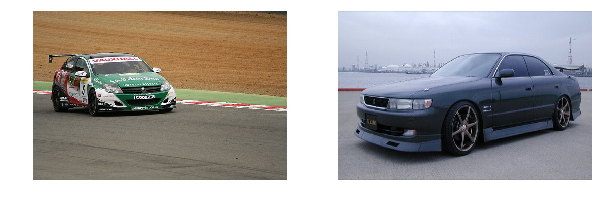

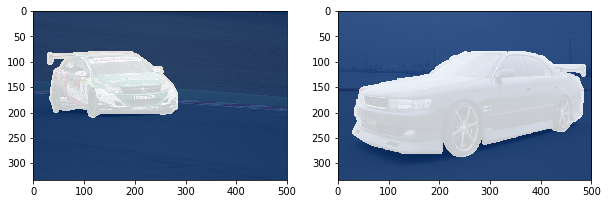

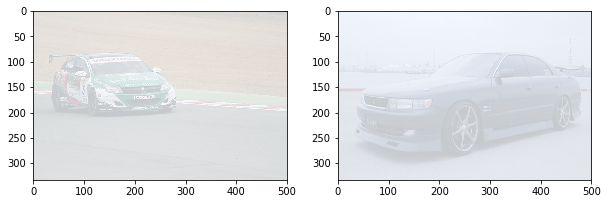

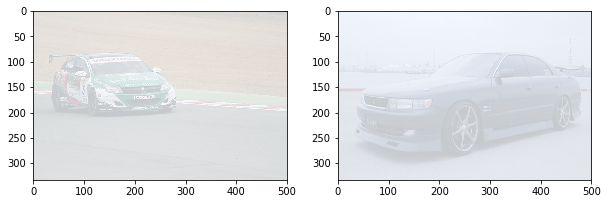

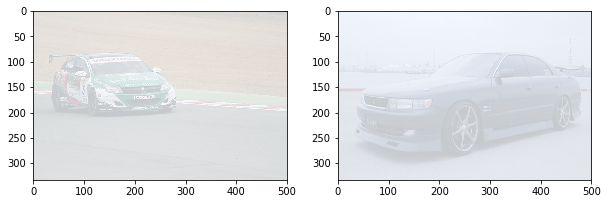

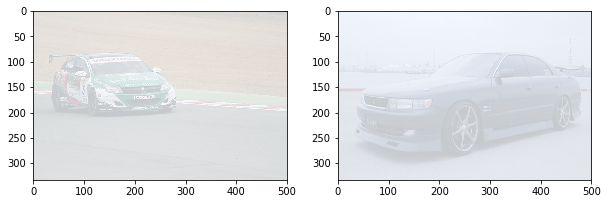

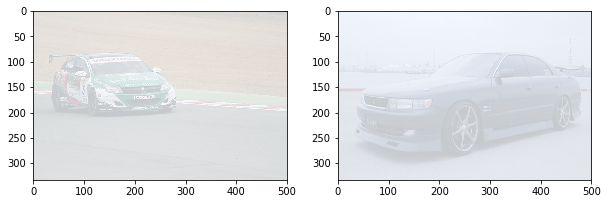

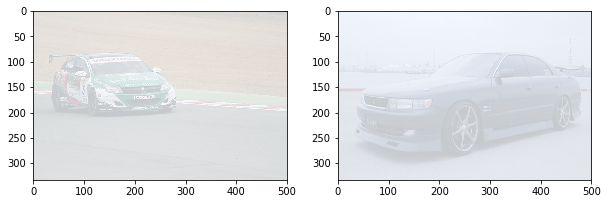

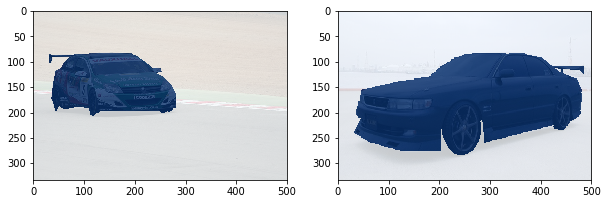

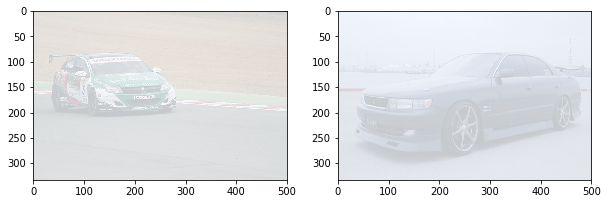

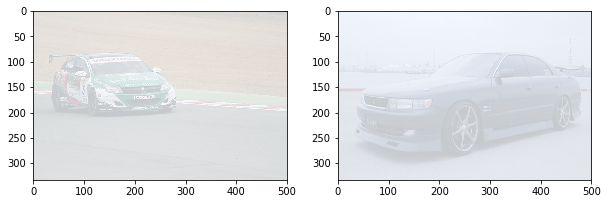

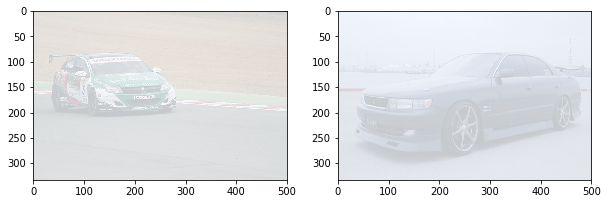

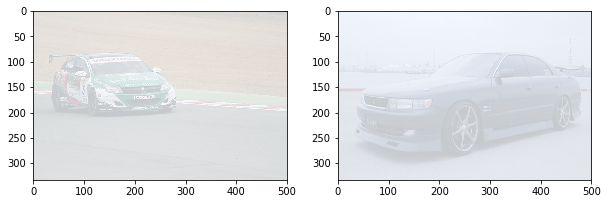

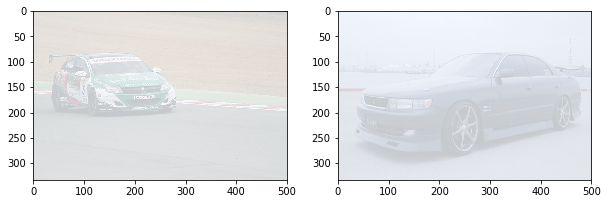

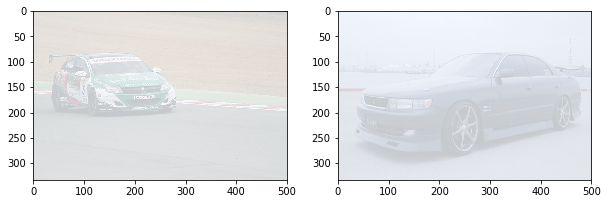

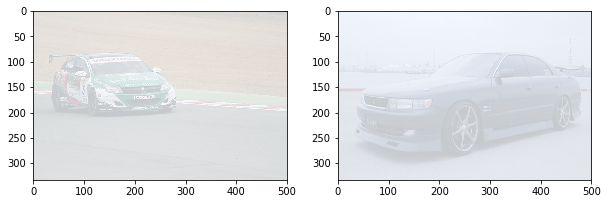

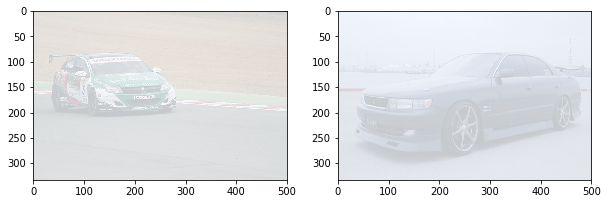

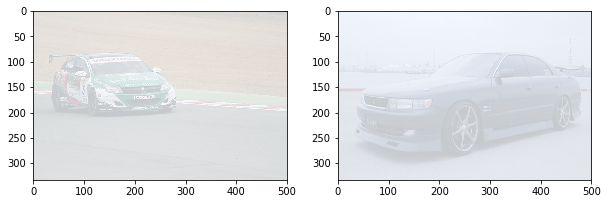

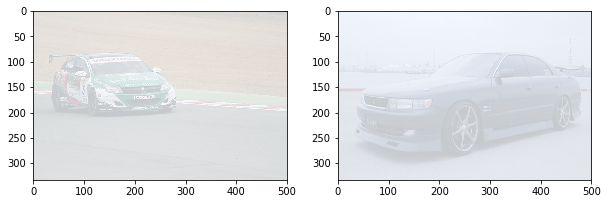

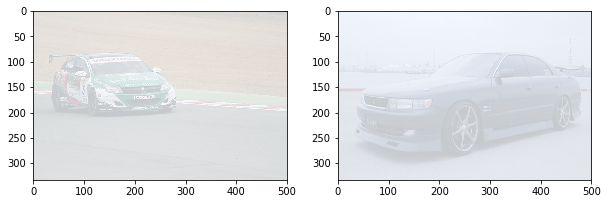

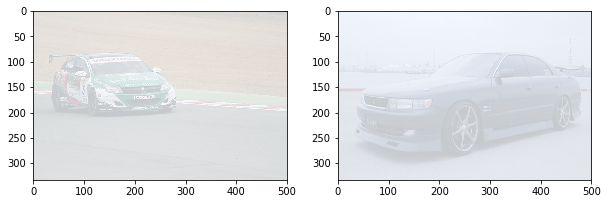

Start Training
Iteration 0 / 1000 
Content loss: 0.0 / No weight: 0.0
Style loss: 1166.55419921875 / No weight: 1166.55419921875
Affine loss: 0.24031615257263184 / No weight: 4.806323051452637e-05
Tv loss: 26.651668548583984 / No weight: 24.031615257263184
Iteration 100 / 1000 
Content loss: 12.321684837341309 / No weight: 0.002464336967468262
Style loss: 53.836578369140625 / No weight: 53.836578369140625
Affine loss: 16.319700241088867 / No weight: 0.0032639400482177734
Tv loss: 8.675559043884277 / No weight: 1631.9700241088867
Iteration 200 / 1000 
Content loss: 12.218177795410156 / No weight: 0.002443635559082031
Style loss: 30.321523666381836 / No weight: 30.321523666381836
Affine loss: 10.034980773925781 / No weight: 0.002006996154785156
Tv loss: 4.6248698234558105 / No weight: 1003.4980773925781
Iteration 300 / 1000 
Content loss: 11.676116943359375 / No weight: 0.002335223388671875
Style loss: 19.830869674682617 / No weight: 19.830869674682617
Affine loss: 7.5035295486450195 / N

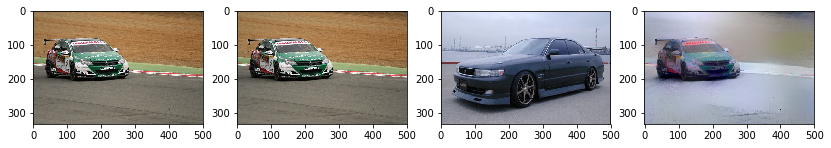

In [3]:
im_content = load_image2("data/VOC/VOCdevkit/VOC2012/JPEGImages/2007_003051.jpg")
im_style = load_image2("data/VOC/VOCdevkit/VOC2012/JPEGImages/2007_003143.jpg", height=im_content.shape[0], width=im_content.shape[1])
im_init = im_content


content_layer = ["conv4_4"]
style_layers = ["conv2_1", "conv3_1", "conv4_1", "conv5_1"]
mask_layer = "conv5_4"

num_iter = 1000
content_loss_w = 5000
style_loss_w = 1
matting_loss_w = 5000
tv_loss_w = 1e-2
K = 3 # is ignored in that case
mask_soft_temp = 1
orphan = False #mean mask not used for style transfer
k_style = []
voc_names = ['2007_003051', '2007_003143']
debug = True

reset()
with tf.Session(config=config) as sess:
    style = StyleTransfer.StyleTransfer(content_layer, style_layers, mask_layer, im_init, im_content, im_style, sess, num_iter, content_loss_w, style_loss_w,
                                             K=K, orphan=orphan, debug=debug, matting_loss=matting_loss_w, tv_loss=tv_loss_w,
                                                soft_temp=mask_soft_temp, voc_names=voc_names, k_style=k_style)
    style1 = style.get_final()